<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_08_La_disugualianza_CHSH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 77.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 67.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import qiskit as qk
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.tools.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

from qiskit.quantum_info import SparsePauliOp

%matplotlib inline

## Parameterized gates

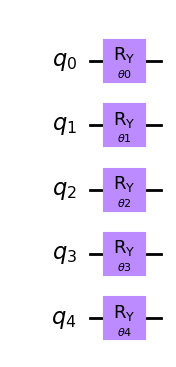

In [ ]:
theta0 = qk.circuit.Parameter("$\\theta0$")
theta1 = qk.circuit.Parameter("$\\theta1$")
theta2 = qk.circuit.Parameter("$\\theta2$")
theta3 = qk.circuit.Parameter("$\\theta3$")
theta4 = qk.circuit.Parameter("$\\theta4$")

circuit = qk.QuantumCircuit(5)
circuit.ry(theta0, 0)
circuit.ry(theta1, 1)
circuit.ry(theta2, 2)
circuit.ry(theta3, 3)
circuit.ry(theta4, 4)

circuit.draw(output="mpl")

In [ ]:
quantum_simulator = qk.Aer.get_backend("qasm_simulator")
state_vector_simulator = qk.Aer.get_backend("statevector_simulator")

In [ ]:
job = qk.execute(circuit, backend=state_vector_simulator, parameter_binds=[
    {
        theta0: [0],
        theta1: [np.pi * 1/4],
        theta2: [np.pi * 2/4],
        theta3: [np.pi * 3/4],
        theta4: [np.pi * 4/4]
    }
])
result = job.result()
state_vector = result.get_statevector()

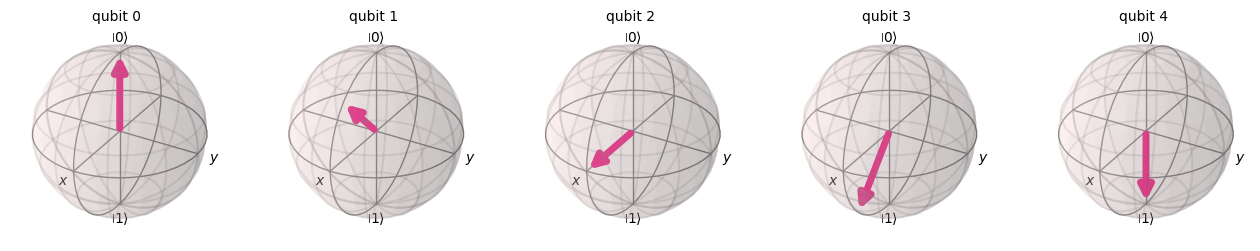

In [ ]:
plot_bloch_multivector(state_vector)

## CHSH Inequality

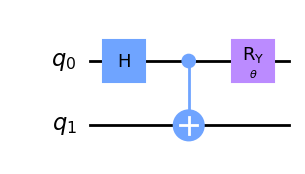

In [ ]:
theta = qk.circuit.Parameter("$\\theta$")

circuit = qk.QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(theta, 0)

circuit.draw(output="mpl")

In [ ]:
phases = np.linspace(0, 2 * np.pi, 21)
phases

array([0.        , 0.31415927, 0.62831853, 0.9424778 , 1.25663706,
       1.57079633, 1.88495559, 2.19911486, 2.51327412, 2.82743339,
       3.14159265, 3.45575192, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604,
       6.28318531])

In [ ]:
ops = SparsePauliOp.from_list([("ZZ", 1), ("ZX", 1), ("XZ", 1), ("XX", 1)])
ops

SparsePauliOp(['ZZ', 'ZX', 'XZ', 'XX'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

In [ ]:
chsh_1 = []
chsh_2 = []

for phase in phases:
  circuit = qk.QuantumCircuit(2)
  circuit.h(0)
  circuit.cx(0, 1)
  circuit.ry(phase, 0)
  instruction = circuit.to_instruction()
  vector = qk.quantum_info.Statevector(instruction)
  val_ZZ = vector.expectation_value(ops[0])
  val_ZX = vector.expectation_value(ops[1])
  val_XZ = vector.expectation_value(ops[2])
  val_XX = vector.expectation_value(ops[3])
  chsh_1.append(val_ZZ - val_ZX + val_XZ + val_XX)
  chsh_2.append(val_ZZ + val_ZX - val_XZ + val_XX)

In [ ]:
x_value = [str(x)+"π" for x in phases/np.pi]
x_value

['0.0π',
 '0.1π',
 '0.2π',
 '0.3π',
 '0.4π',
 '0.5π',
 '0.6π',
 '0.7π',
 '0.8π',
 '0.9π',
 '1.0π',
 '1.1π',
 '1.2π',
 '1.3π',
 '1.4π',
 '1.5π',
 '1.6π',
 '1.7π',
 '1.8π',
 '1.9π',
 '2.0π']

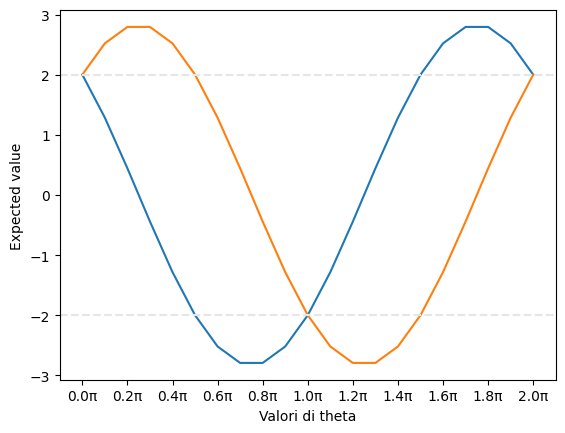

In [ ]:
plt.plot(x_value, chsh_1)
plt.plot(x_value, chsh_2)

plt.xlabel("Valori di theta")
plt.ylabel("Expected value")
plt.xticks(range(0, 21, 2))

plt.axhline(y=2, color="0.9", linestyle="--")
plt.axhline(y=-2, color="0.9", linestyle="--")